In [90]:
#import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
from matplotlib import style
#sta matplotlib to inline and displays graphs below the corresponding cell.
%matplotlib inline
import os
from sklearn.datasets import *
import warnings
warnings.filterwarnings('ignore')

In [91]:
df=pd.read_csv('Automobile.csv')
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [92]:
df.shape

(201, 26)

In [93]:
#data cleaning
df.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.00,0.00,1.00,2.00,3.00
normalized_losses,201.0,125.189055,33.572966,65.00,101.00,122.00,150.00,256.00
wheel_base,201.0,98.797015,6.066366,86.60,94.50,97.00,102.40,120.90
length,201.0,174.200995,12.322175,141.10,166.80,173.20,183.50,208.10
width,201.0,65.889055,2.101471,60.30,64.10,65.50,66.60,72.00
height,201.0,53.766667,2.447822,47.80,52.00,54.10,55.50,59.80
curb_weight,201.0,2555.666667,517.296727,1488.00,2169.00,2414.00,2926.00,4066.00
engine_size,201.0,126.875622,41.546834,61.00,98.00,120.00,141.00,326.00
bore,201.0,3.329701,0.268166,2.54,3.15,3.31,3.58,3.94
stroke,201.0,3.261741,0.317875,2.07,3.11,3.29,3.46,4.17


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling              201 non-null int64
normalized_losses      201 non-null int64
make                   201 non-null object
fuel_type              201 non-null object
aspiration             201 non-null object
number_of_doors        201 non-null object
body_style             201 non-null object
drive_wheels           201 non-null object
engine_location        201 non-null object
wheel_base             201 non-null float64
length                 201 non-null float64
width                  201 non-null float64
height                 201 non-null float64
curb_weight            201 non-null int64
engine_type            201 non-null object
number_of_cylinders    201 non-null object
engine_size            201 non-null int64
fuel_system            201 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression_ratio      201 non-nu

In [96]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [97]:
cols=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price']
for i in cols:
    def check(data):
        t=data[i].loc[data[i]=='?']
        return t
    

    g=check(df)
    print(g)

Series([], Name: symboling, dtype: int64)
Series([], Name: normalized_losses, dtype: int64)
Series([], Name: make, dtype: object)
Series([], Name: fuel_type, dtype: object)
Series([], Name: aspiration, dtype: object)
Series([], Name: number_of_doors, dtype: object)
Series([], Name: body_style, dtype: object)
Series([], Name: drive_wheels, dtype: object)
Series([], Name: engine_location, dtype: object)
Series([], Name: wheel_base, dtype: float64)
Series([], Name: length, dtype: float64)
Series([], Name: width, dtype: float64)
Series([], Name: height, dtype: float64)
Series([], Name: curb_weight, dtype: int64)
Series([], Name: engine_type, dtype: object)
Series([], Name: number_of_cylinders, dtype: object)
Series([], Name: engine_size, dtype: int64)
Series([], Name: fuel_system, dtype: object)
Series([], Name: bore, dtype: float64)
Series([], Name: stroke, dtype: float64)
Series([], Name: compression_ratio, dtype: float64)
Series([], Name: horsepower, dtype: int64)
Series([], Name: peak_

In [98]:
#thus the data shows there is no null values and also no special characters in the place of values

In [99]:
#what are the columns which are object
obj=list(df.select_dtypes(include=['object']))
obj

['make',
 'fuel_type',
 'aspiration',
 'number_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'number_of_cylinders',
 'fuel_system']

In [100]:
#what are the columns which are float and int
flint=list(df.select_dtypes(include=['int64','float64']))
flint

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

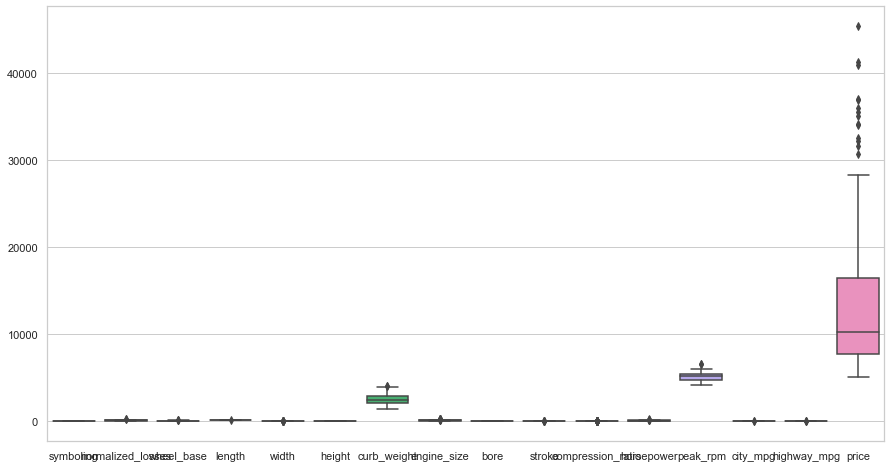

In [102]:
#checking for outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

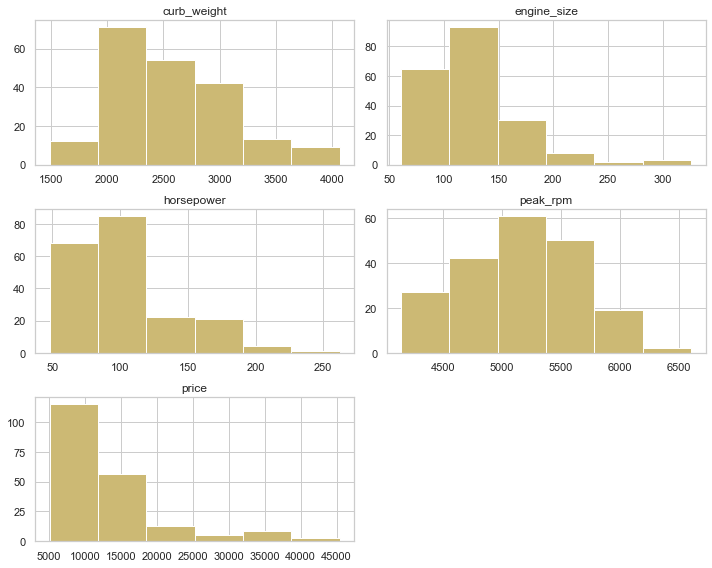

In [101]:
df[['engine_size','peak_rpm','curb_weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='Y')
plt.tight_layout()
plt.show()

In [103]:
print('the minimum price of car: %0.2d, the maximum price of the car: %0.2d'%(df['price'].min(),df['price'].max()))

the minimum price of car: 5118, the maximum price of the car: 45400


In [104]:
df['make'][df['price']>=30000].count()

14

In [105]:
#there are 14 cars like that which are highly priced due to its features

In [106]:
d=df['make'][df['price']>=30000].value_counts().count()
print(d)
df['make'][df['price']>=30000].value_counts()

4


mercedes-benz    5
jaguar           3
bmw              3
porsche          3
Name: make, dtype: int64

In [107]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [108]:
df.aspiration.value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

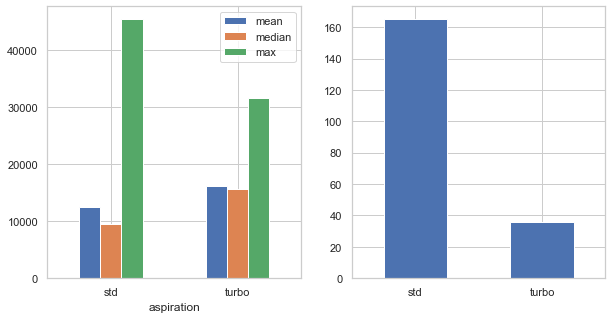

In [109]:
fig,a=plt.subplots(1,2,figsize=(10,5))
df.groupby('aspiration')['price'].agg(['mean','median','max']).plot.bar(rot=0,ax=a[0])
df.aspiration.value_counts().plot.bar(rot=0,ax=a[1])

#There are some cars which are std aspiration are higher in price rather than Turbo but people are purcahsing more
std aspiration cars only due to the price, as we can see that the average price is less than 10000 dollars. So many
of the people pretend to buy the std cars.

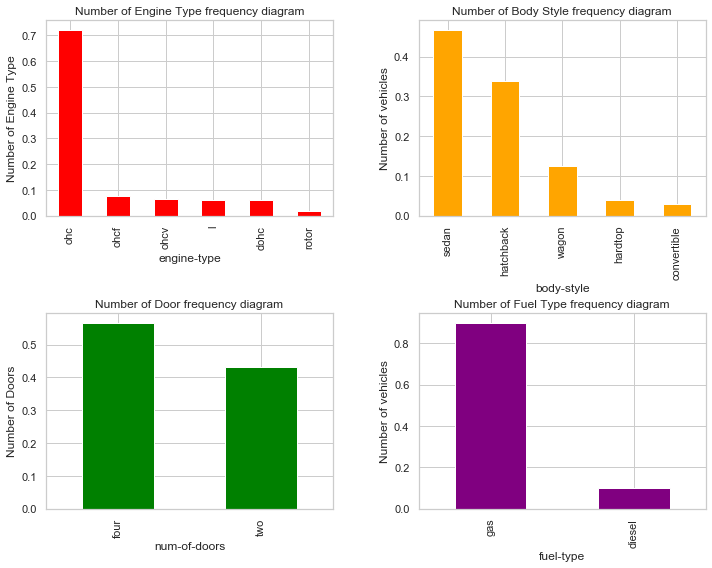

In [110]:
plt.figure(1)
plt.subplot(221)
df['engine_type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');

plt.subplot(222)
df['body_style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');

plt.subplot(223)
df['number_of_doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(224)
df['fuel_type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');


plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.show()

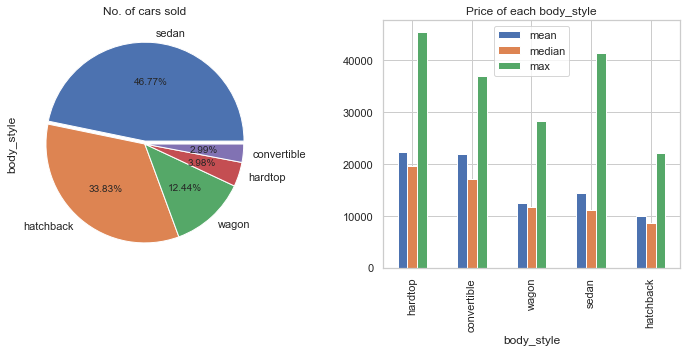

In [111]:
fig,a=plt.subplots(1,2,figsize=(10,2))
df.body_style.value_counts().plot.pie(explode=(0.03,0,0,0,0),autopct='%0.2f%%',figsize=(10,5),ax=a[0])
a[0].set_title('No. of cars sold')


df.groupby('body_style')['price'].agg(['mean','median','max']).sort_values(by='median',ascending=False).plot.bar(ax=a[1])
a[1].set_title('Price of each body_style')
plt.tight_layout()
plt.show()

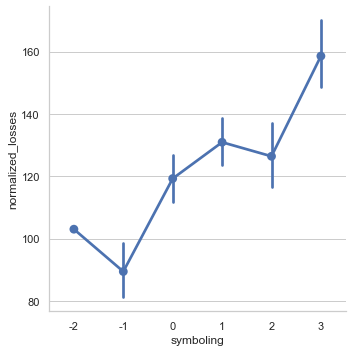

In [112]:
sns.catplot(data=df, y="normalized_losses", x="symboling"  ,kind="point")

In [113]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


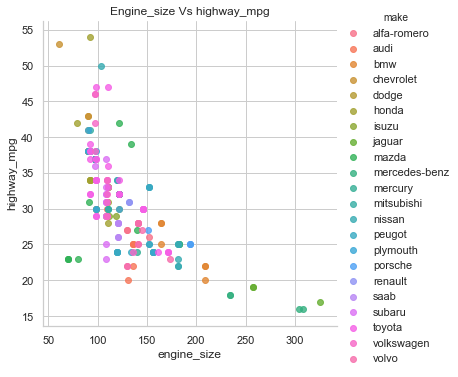

In [114]:
sns.lmplot('engine_size','highway_mpg',hue='make',data=df,fit_reg=False)
plt.title('Engine_size Vs highway_mpg')
plt.show()


Text(0.5, 1, 'Engine_size Vs city_mpg')

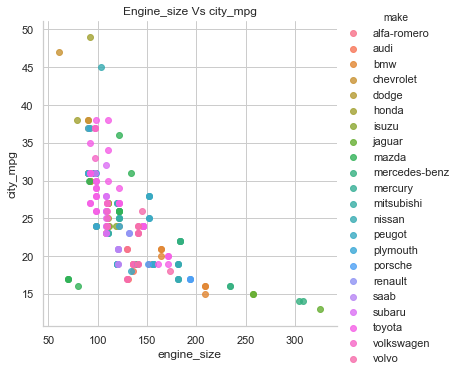

In [115]:
sns.lmplot('engine_size','city_mpg',hue='make',data=df,fit_reg=False)
plt.title('Engine_size Vs city_mpg')

In [116]:
df[['make','fuel_type','aspiration','number_of_doors','body_style','drive_wheels','engine_location']][df['engine_size']>=300]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location
46,jaguar,gas,std,two,sedan,rwd,front
70,mercedes-benz,gas,std,four,sedan,rwd,front
71,mercedes-benz,gas,std,two,hardtop,rwd,front


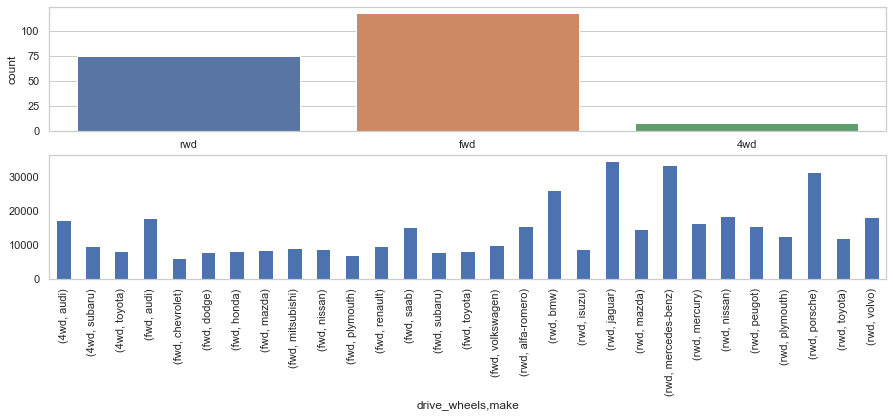

In [117]:
# df.drive_wheels.value_counts().plot.bar()
fig,ax=plt.subplots(2,1,figsize=(15,5))
sns.countplot(x='drive_wheels',data=df,ax=ax[0])
df.groupby(['drive_wheels','make'])['price'].mean().plot.bar(ax=ax[1])
plt.grid()
plt.show()


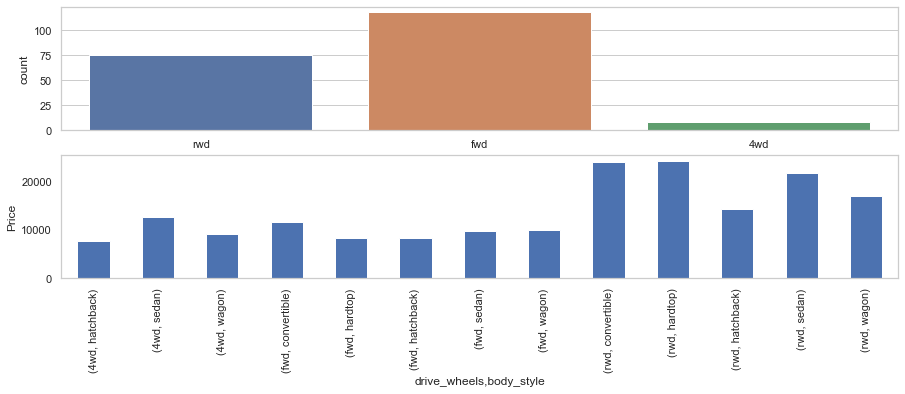

In [125]:
fig,ax=plt.subplots(2,1,figsize=(15,5))
sns.countplot(x='drive_wheels',data=df,ax=ax[0])
df.groupby(['drive_wheels','body_style'])['price'].mean().plot.bar(ax=ax[1])
ax[1].set_ylabel('Price')
plt.grid()
plt.show()

As per before inferences, the people who purchased 46.77% sedan bodystyles cars which are having forward wheel drive(fwd)
whose cost range between 10000 to 11000 dollars followed by 33.83% of hatchback and 12.44% of wagon body styles are purchased


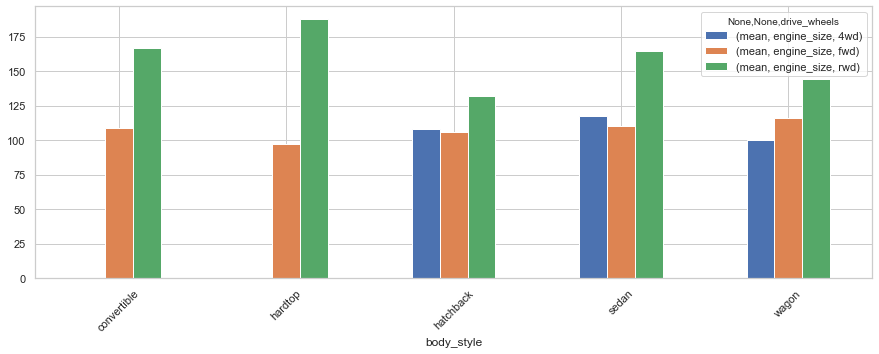

mean                        
             engine_size                        
drive_wheels         4wd         fwd         rwd
body_style                                      
convertible     0.000000  109.000000  166.800000
hardtop         0.000000   97.000000  187.571429
hatchback     108.000000  105.816327  132.277778
sedan         117.333333  110.672727  165.000000
wagon         100.000000  116.333333  144.444444

In [118]:
dff=pd.pivot_table(df,index=['body_style'],columns=['drive_wheels'],values=['engine_size'],
                   aggfunc=['mean'],fill_value=0)

dff.plot.bar(figsize=(15,5),rot=45)
plt.show()
dff

#from the pivot table and plot we can observe that the bodystyle of hardtop's engine size with 'rwd' is very much
greater also observed that [Convertible,Hardtop] body style's doesnot contain any '4wd'.

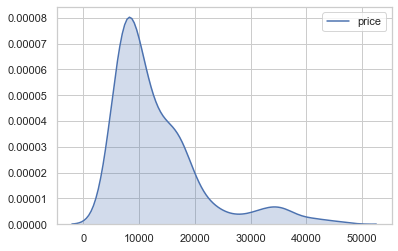

In [122]:
sns.kdeplot(df['price'],shade=True)

In [120]:
df.price.max()

45400

,city_mpg,highway_mpg
drive_wheels,,
4wd,192,223
fwd,3322,4021
rwd,1547,1924


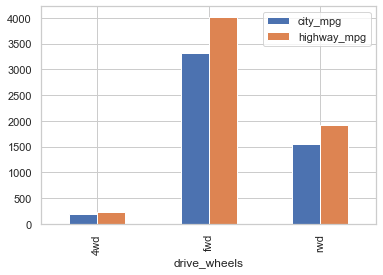

In [132]:
df.groupby('drive_wheels')[['city_mpg','highway_mpg']].agg('sum').plot.bar()
df.groupby('drive_wheels')[['city_mpg','highway_mpg']].agg('sum')

The cars which are having forward wheel drive(fwd) having high milage followed by Rear wheel drive(rwd),4wd.

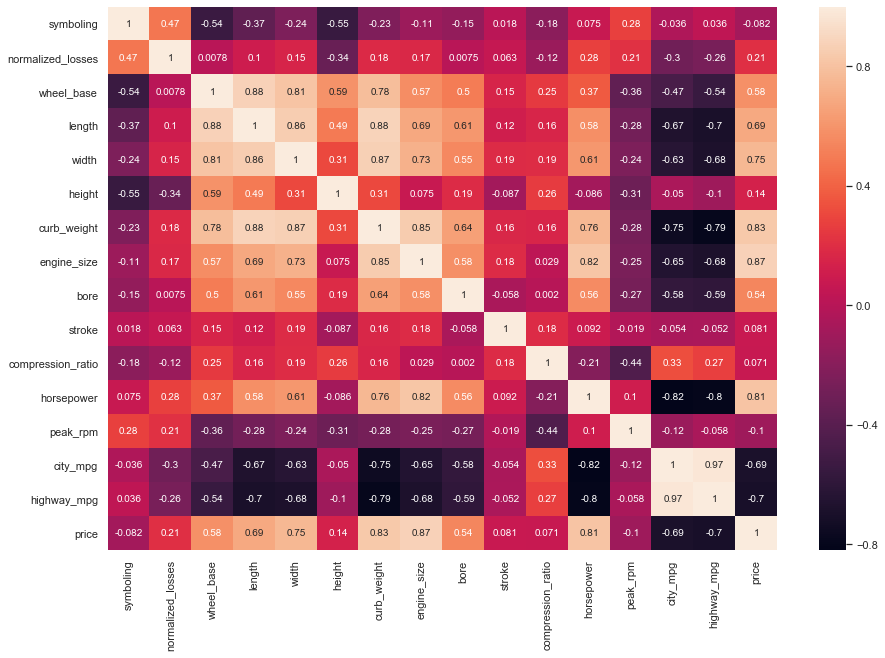

In [135]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

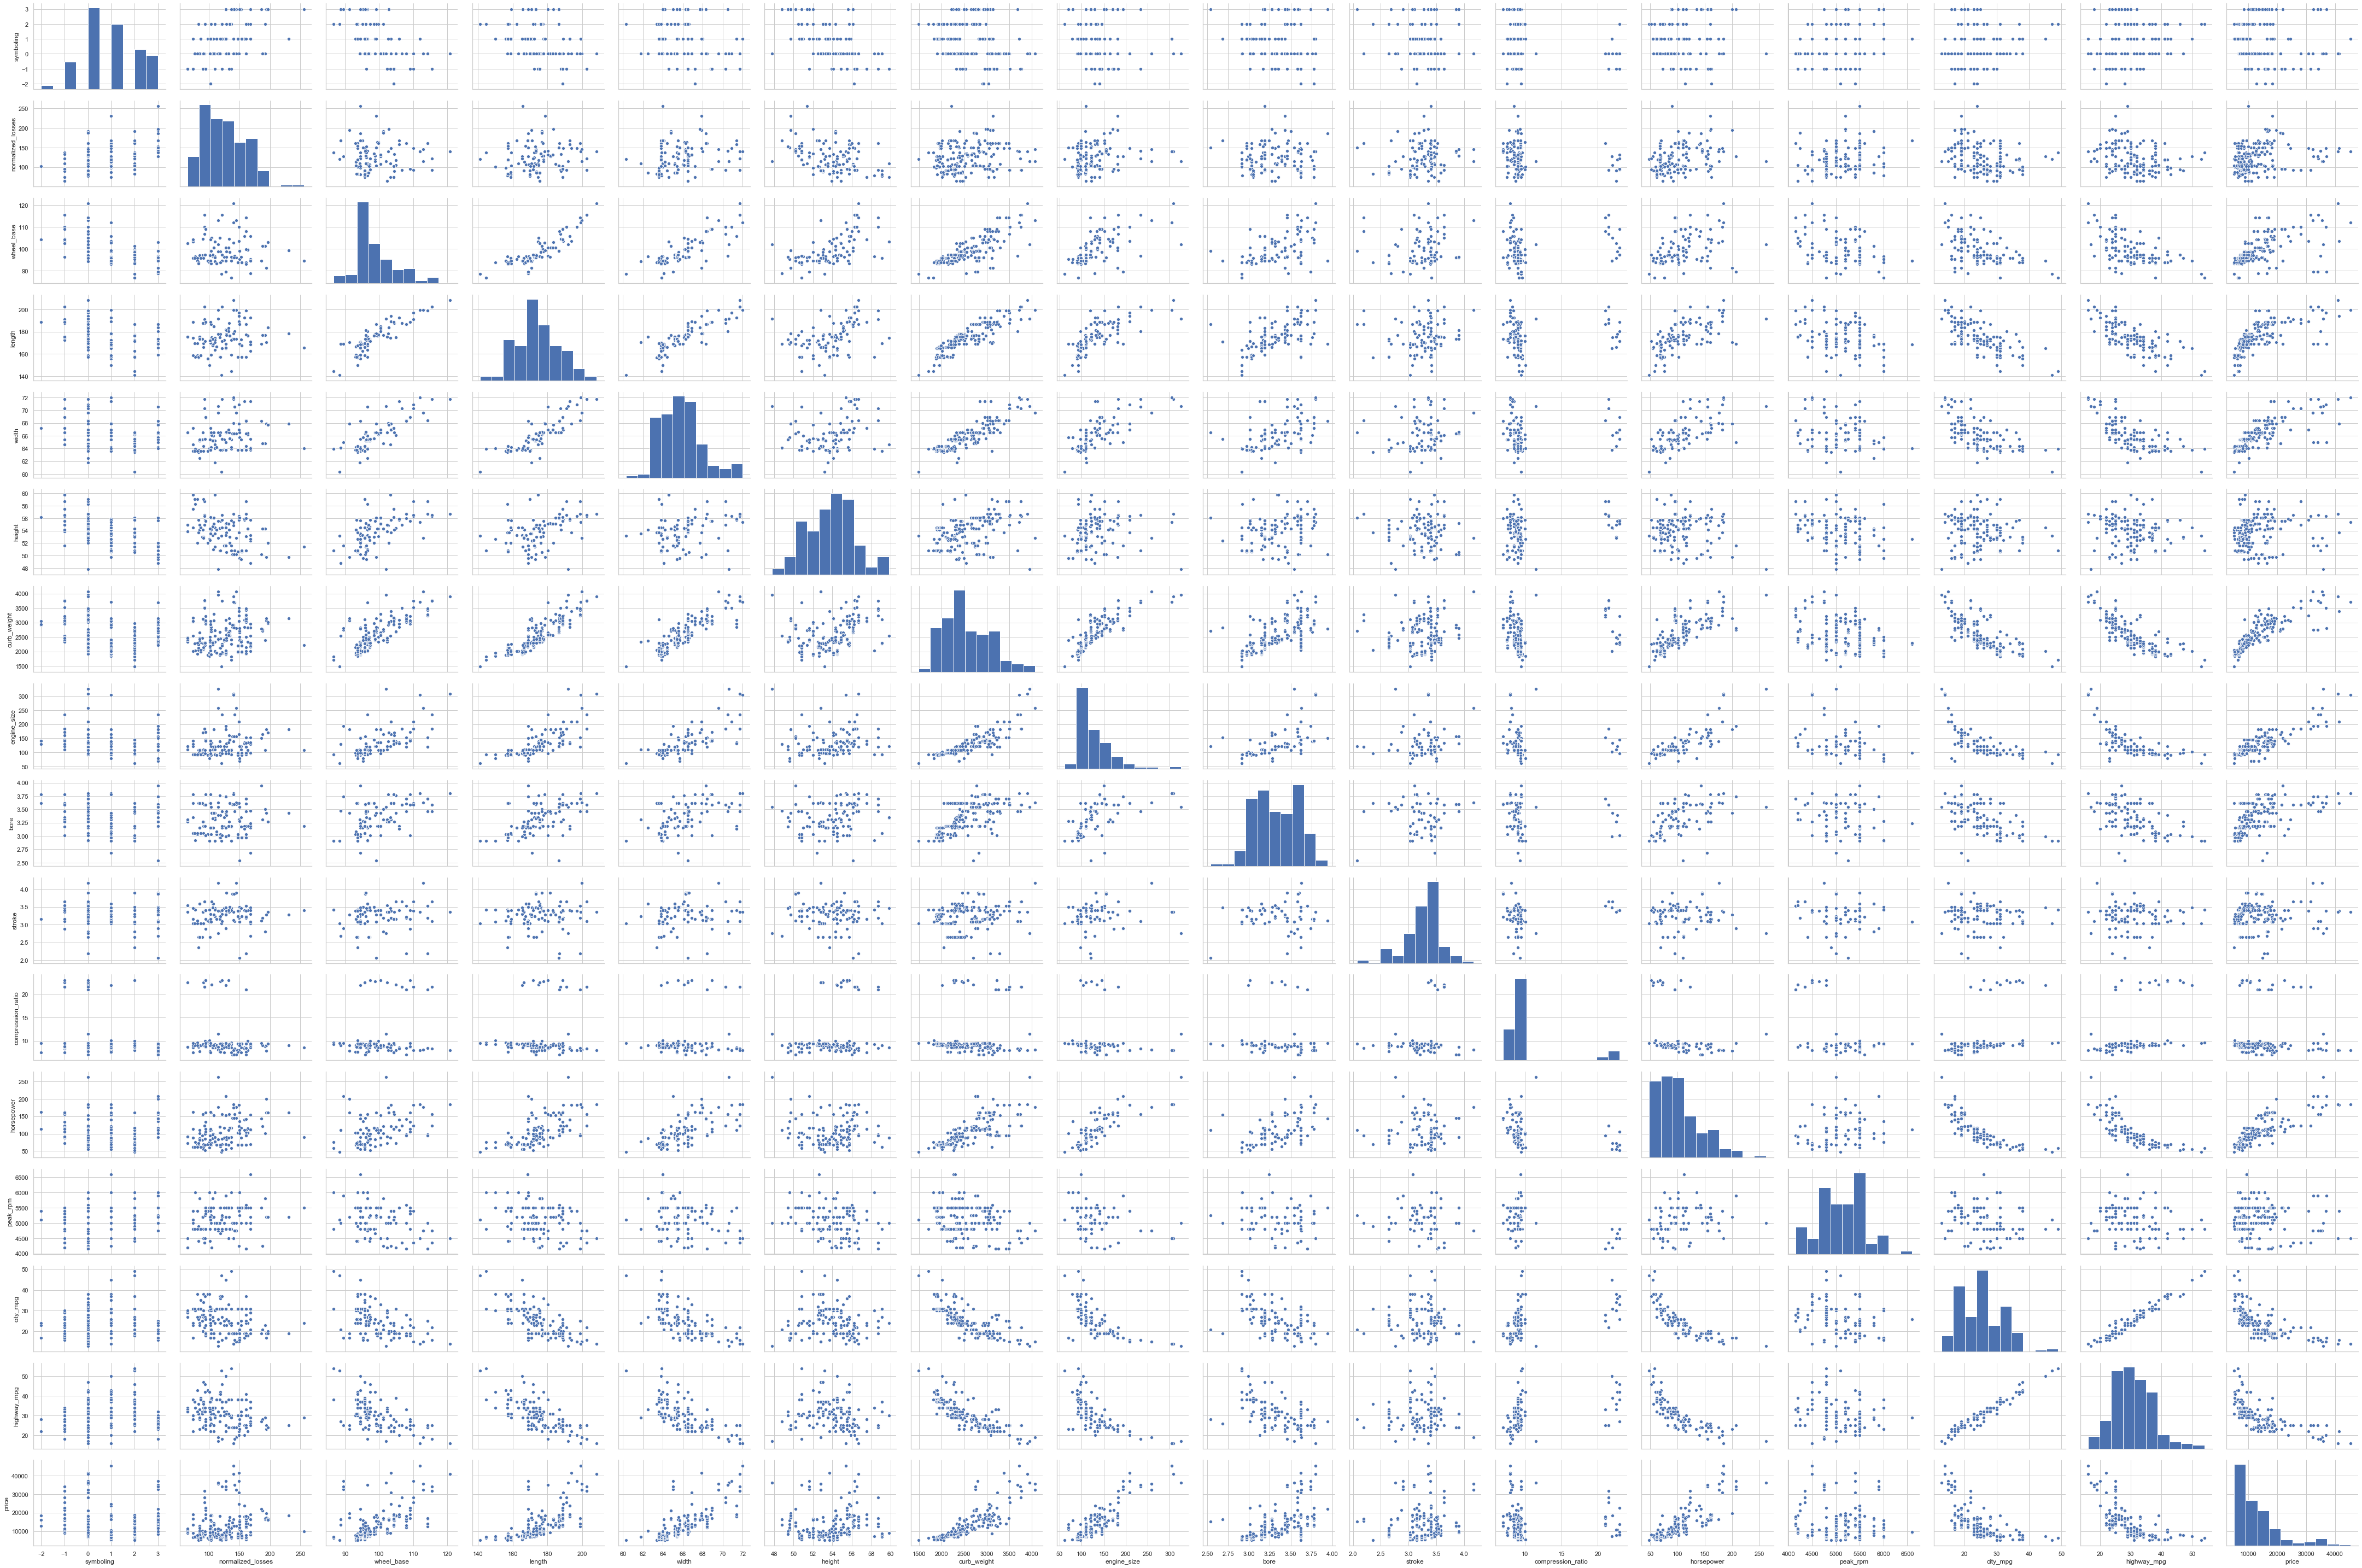

In [139]:
sns.pairplot(df,aspect=1.5)

From the above pairplot we can observe that which Variables are postively, negatively, and No correlations at all.

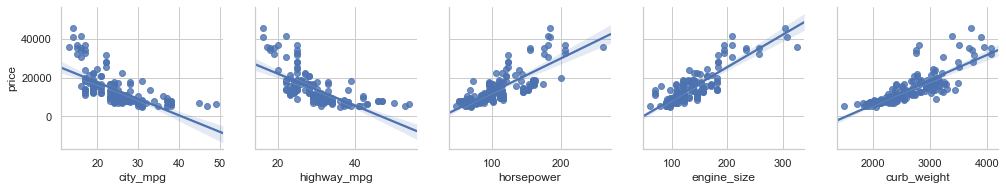

In [172]:
sns.pairplot(data=df,x_vars=['city_mpg','highway_mpg','horsepower','engine_size','curb_weight'],y_vars=['price'],kind='reg',size=2.8)

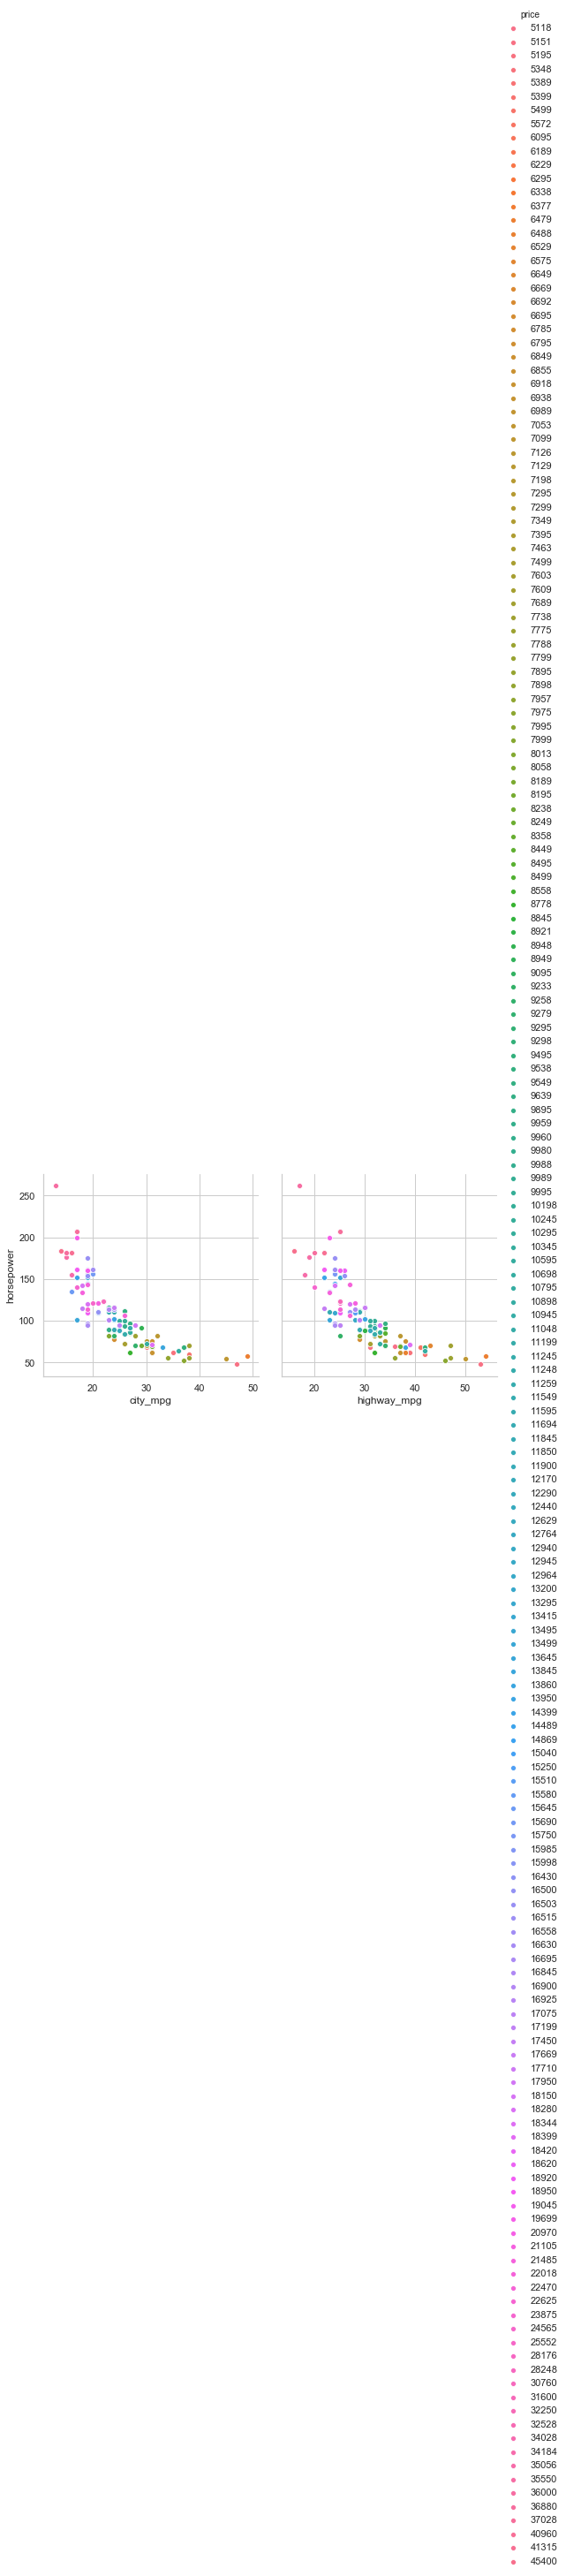

In [180]:
sns.pairplot(data=df,x_vars=['city_mpg','highway_mpg'],y_vars=['horsepower'],hue='price',size=4)
plt.savefig('pairplot.png')

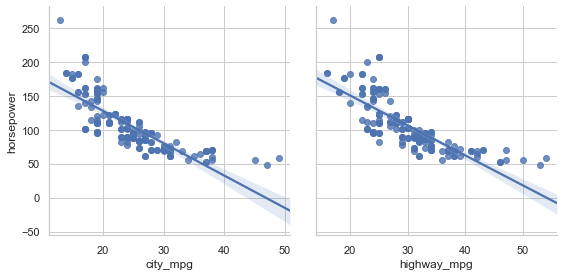

In [179]:
sns.pairplot(data=df,x_vars=['city_mpg','highway_mpg'],y_vars=['horsepower'],kind='reg',size=4)